# sunkeutools.ml logistic classifier

In [1]:
%autosave 0
%matplotlib inline
import sunekutools as st

Autosave disabled


In [2]:
# Save the model (as a pickle file) here
OUTPUT_FILE = '/suneku/data/LogisticClassifier.p'

## Load Fisher's iris dataset

In [3]:
# We want to classify flowers into 1 of 3 categories: {'setosa','versicolor','virginica'}
Data = st.ml.get_practice_data(False)
st.afew(Data)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Type
FlowerId,,,,,
31,5.4,3.4,1.5,0.4,Setosa
36,5.5,3.5,1.3,0.2,Setosa
38,4.4,3.0,1.3,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
73,6.1,2.8,4.7,1.2,Versicolor
83,6.0,2.7,5.1,1.6,Versicolor
122,7.7,2.8,6.7,2.0,Virginica
131,7.9,3.8,6.4,2.0,Virginica
139,6.9,3.1,5.4,2.1,Virginica


## Create a `LogisticClassifier` object

In [4]:
# Initialize a logistic classifier and set parameters
LC = st.ml.LogisticClassifier(Data,target='Type')
LC

Classifier object with 150 samples

Target:
  Type

Categories:
  Setosa
  Versicolor
  Virginica

Predictors:
  PetalLength
  PetalWidth
  SepalLength
  SepalWidth

Model:
  LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [5]:
# Reset the model (optionally with different parameters)
model_params = {
    'solver':'liblinear',
    'penalty':'l1' }
LC.reset(model_params)
LC.model

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

## Inspect the training data

In [6]:
# How often does each category appear in the data?
LC.target_freq()

Setosa        0.333333
Versicolor    0.333333
Virginica     0.333333
Name: Type, dtype: float64

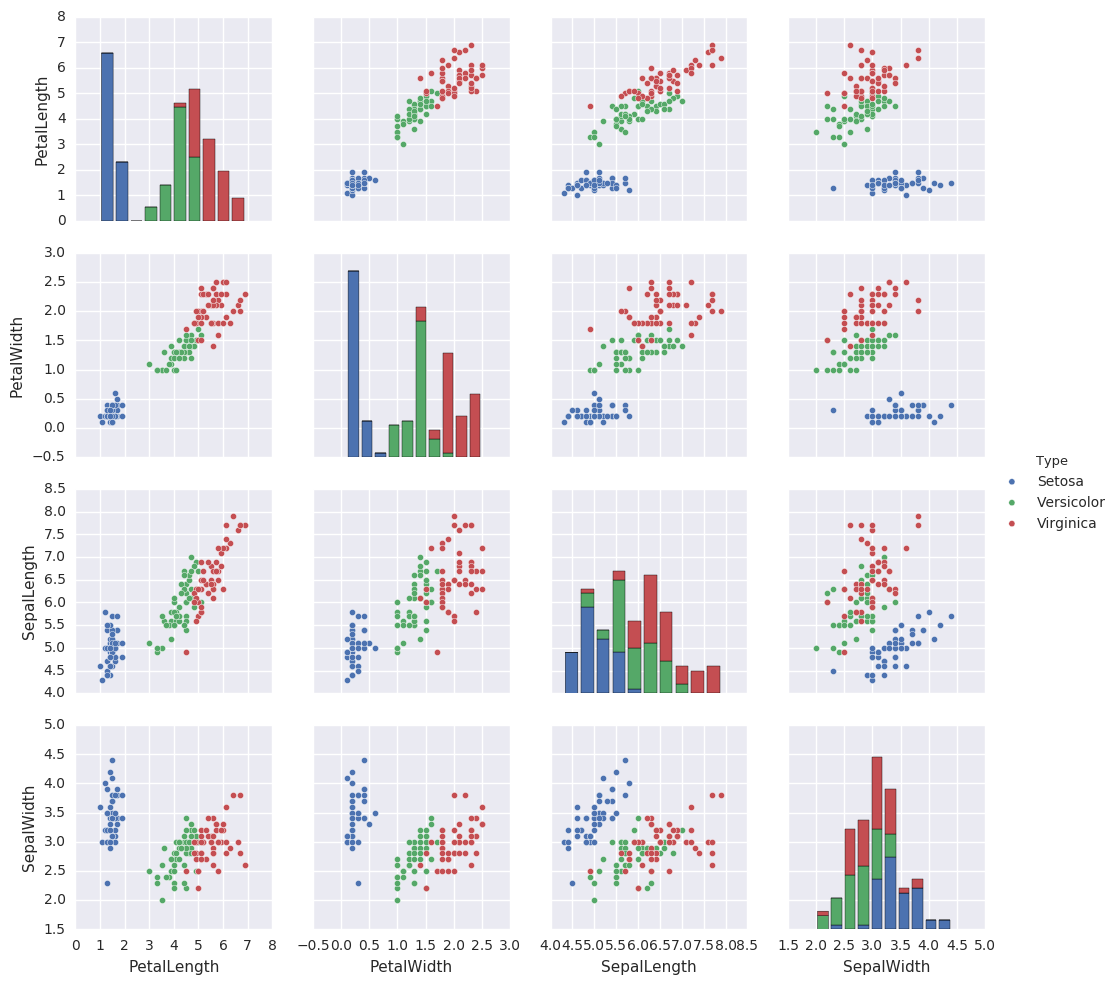

In [7]:
# Show seaborn pairplot
LC.pairplot()

## Test the classifier

In [8]:
# Parition the data into training and testing sets
Training, Testing = LC.partition(nSamples=100)

In [9]:
# Test the classifier
TestResult = LC.test(Training,Testing)
st.afew(TestResult)

Training classifier with 100 samples
Classifying 50 samples


,Reality,Model,pSetosa,pVersicolor,pVirginica,IsCorrect
FlowerId,,,,,,
6,Setosa,Setosa,0.912,0.088,0.000,True
32,Setosa,Setosa,0.985,0.015,0.000,True
46,Setosa,Setosa,0.963,0.037,0.000,True
62,Versicolor,Versicolor,0.020,0.970,0.010,True
63,Versicolor,Versicolor,0.027,0.762,0.211,True
96,Versicolor,Versicolor,0.084,0.845,0.071,True
103,Virginica,Virginica,0.002,0.298,0.700,True
118,Virginica,Virginica,0.000,0.420,0.579,True
132,Virginica,Virginica,0.002,0.259,0.739,True


In [10]:
# What kind of mistakes did it make?
LC.confusion(TestResult)

48 of 50 (96.0%) classifications were correct


,Setosa,Versicolor,Virginica
Actually Setosa,18,1,0
Actually Versicolor,0,17,0
Actually Virginica,0,1,13


In [11]:
# Run a "null test" with a naive classifier
NullResult = LC.null_test(Training,Testing)
LC.confusion(NullResult)

15 of 50 (30.0%) classifications were correct


,Setosa,Versicolor,Virginica
Actually Setosa,6,7,6
Actually Versicolor,8,5,4
Actually Virginica,7,3,4


In [12]:
# Which features did the classifier find important?
LC.coefs()

,PetalLength,PetalWidth,SepalLength,SepalWidth
Setosa,-188.0,0.0,0.0,162.0
Versicolor,46.0,-156.0,35.0,-349.0
Virginica,361.0,554.0,-237.0,-270.0


## Train the model and try it out on some new data

In [13]:
# Train the model using all available samples
LC.train()

Training classifier with 150 samples


In [14]:
# Make some simulated flowers by adding noise to real flowers
Target, Cats, Predictors = LC._unpack()
NewPredictors = Predictors.copy()
def add_noise(s):
    return s + st.np.random.normal( loc=0, scale=0.1*s.std(), size=len(s) )
NewPredictors = NewPredictors.apply(add_noise)

NewPredictors.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth
FlowerId,,,,
0,1.742285,0.163605,5.134533,3.503781
1,1.248347,0.232391,4.771081,3.009395
2,1.146958,0.258895,4.688917,3.148194
3,1.618579,0.172740,4.525737,3.133875
4,1.178615,0.084820,5.062058,3.528704


In [15]:
# Run the model on these new simulated flowers
NewResult = LC.classify(NewPredictors)
NewResult.head()

Classifying 150 samples


,Type,pSetosa,pVersicolor,pVirginica
FlowerId,,,,
0,Setosa,0.836,0.164,0.0
1,Setosa,0.758,0.242,0.0
2,Setosa,0.839,0.161,0.0
3,Setosa,0.696,0.304,0.0
4,Setosa,0.905,0.095,0.0


In [16]:
# How well did the model classify the simulated flowers?
NewResult = NewResult.rename(columns={'Type':'Model'})
NewResult['Reality'] = LC.data['Type']
NewResult['IsCorrect'] = NewResult['Model'] == NewResult['Reality']
LC.confusion(NewResult)

145 of 150 (96.67%) classifications were correct


,Setosa,Versicolor,Virginica
Actually Setosa,49,1,0
Actually Versicolor,1,47,2
Actually Virginica,0,1,49


## Save the model to use for predictions later

In [17]:
# Save the model to file
LC.save(OUTPUT_FILE)

In [18]:
# Load the saved model and see if it still works
NewLC = st.ml.LogisticClassifier.load(OUTPUT_FILE)
NewTraining, NewTesting = NewLC.partition(nSamples=100)
NewTestResult = NewLC.test(NewTraining,NewTesting)

Training classifier with 100 samples
Classifying 50 samples


In [19]:
# What kind of mistakes did it make this time?
NewLC.confusion(NewTestResult)

46 of 50 (92.0%) classifications were correct


,Setosa,Versicolor,Virginica
Actually Setosa,17,0,0
Actually Versicolor,0,16,1
Actually Virginica,0,3,13
